In [186]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
import datetime
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [187]:
covid = pd.read_csv('project_data_preprocessed.csv')

In [188]:
covid['Date'] = pd.to_datetime(covid['Date_reported'])
covid = covid.set_index(covid['Date'])

In [189]:
st = '2020-01-01'
en = '2020-08-18'

train = covid.loc[st:en]
test  = covid.loc[en:]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (2153, 31)
Test Dataset: (19, 31)


In [190]:
train = train.drop(['Unnamed: 0', 'Date_reported', ' Country', 'Date'], axis=1)
test = test.drop(['Unnamed: 0', 'Date_reported', ' Country', 'Date'], axis=1)
covid = covid.drop(['Unnamed: 0', 'Date_reported', ' Country', 'Date'], axis=1)

In [191]:
X = covid[covid.columns[:-1]].to_numpy()
y = covid[covid.columns[-1]].to_numpy()

In [192]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train[train.columns[:-1]].to_numpy(), test[test.columns[:-1]].to_numpy(), train[train.columns[-1]].to_numpy(), test[test.columns[-1]].to_numpy()

In [193]:
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', penalty='l2', C=0.5, class_weight='balanced')

In [194]:
lr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   multi_class='multinomial')

In [195]:
y_pred = lr.predict(X_test)

In [196]:
y_pred

array([2., 2., 4., 1., 1., 3., 3., 2., 1., 1., 1., 0., 1., 1., 1., 2., 3.,
       3., 2.])

In [197]:
y_test

array([3., 2., 3., 2., 2., 3., 3., 1., 1., 1., 1., 0., 1., 2., 2., 2., 2.,
       2., 2.])

In [198]:
accuracy_score(y_pred, y_test)

0.5263157894736842

In [199]:
#clf = LogisticRegressionCV(cv=5, random_state=0, max_iter=10000).fit(X, y)

In [200]:
#y_pred = clf.predict(X_test)

In [201]:
#accuracy_score(y_pred, y_test)

In [202]:
scores = cross_validate(lr, X, y, cv=10,
                         scoring=('r2', 'neg_mean_squared_error','accuracy'),
                         return_train_score=True)

In [203]:
print('Mean train and test accuracy scores:', scores['train_accuracy'].mean(), scores['test_accuracy'].mean())
print('Mean train and test r2 scores:', scores['train_r2'].mean(), scores['test_r2'].mean())
print('Mean train and test negative mean squared error scores:', scores['train_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].mean())

Mean train and test accuracy scores: 0.7063108424048156 0.6409220856801502
Mean train and test r2 scores: 0.43612234097283303 0.28959146398039376
Mean train and test negative mean squared error scores: -0.39441664815343763 -0.4965779143198497


In [204]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    _, axes = plt.subplots(figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

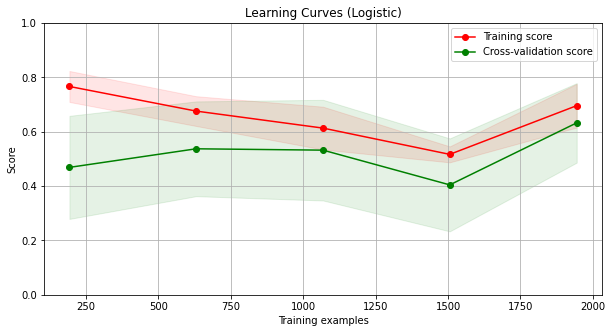

In [205]:

title = "Learning Curves (Logistic)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.33, random_state=0)

plot_learning_curve(lr, title, X, y, ylim=(0.0, 1.00),
                    cv=10, n_jobs=4)

plt.show()